In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = pd.read_csv("/content/drive/MyDrive/DataSets/personality_dataset.csv")

In [3]:
ds

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [4]:
ds2 = ds

In [5]:
print(ds.columns)
print(ds.shape)

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')
(2900, 8)


In [6]:
ds.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


<Axes: >

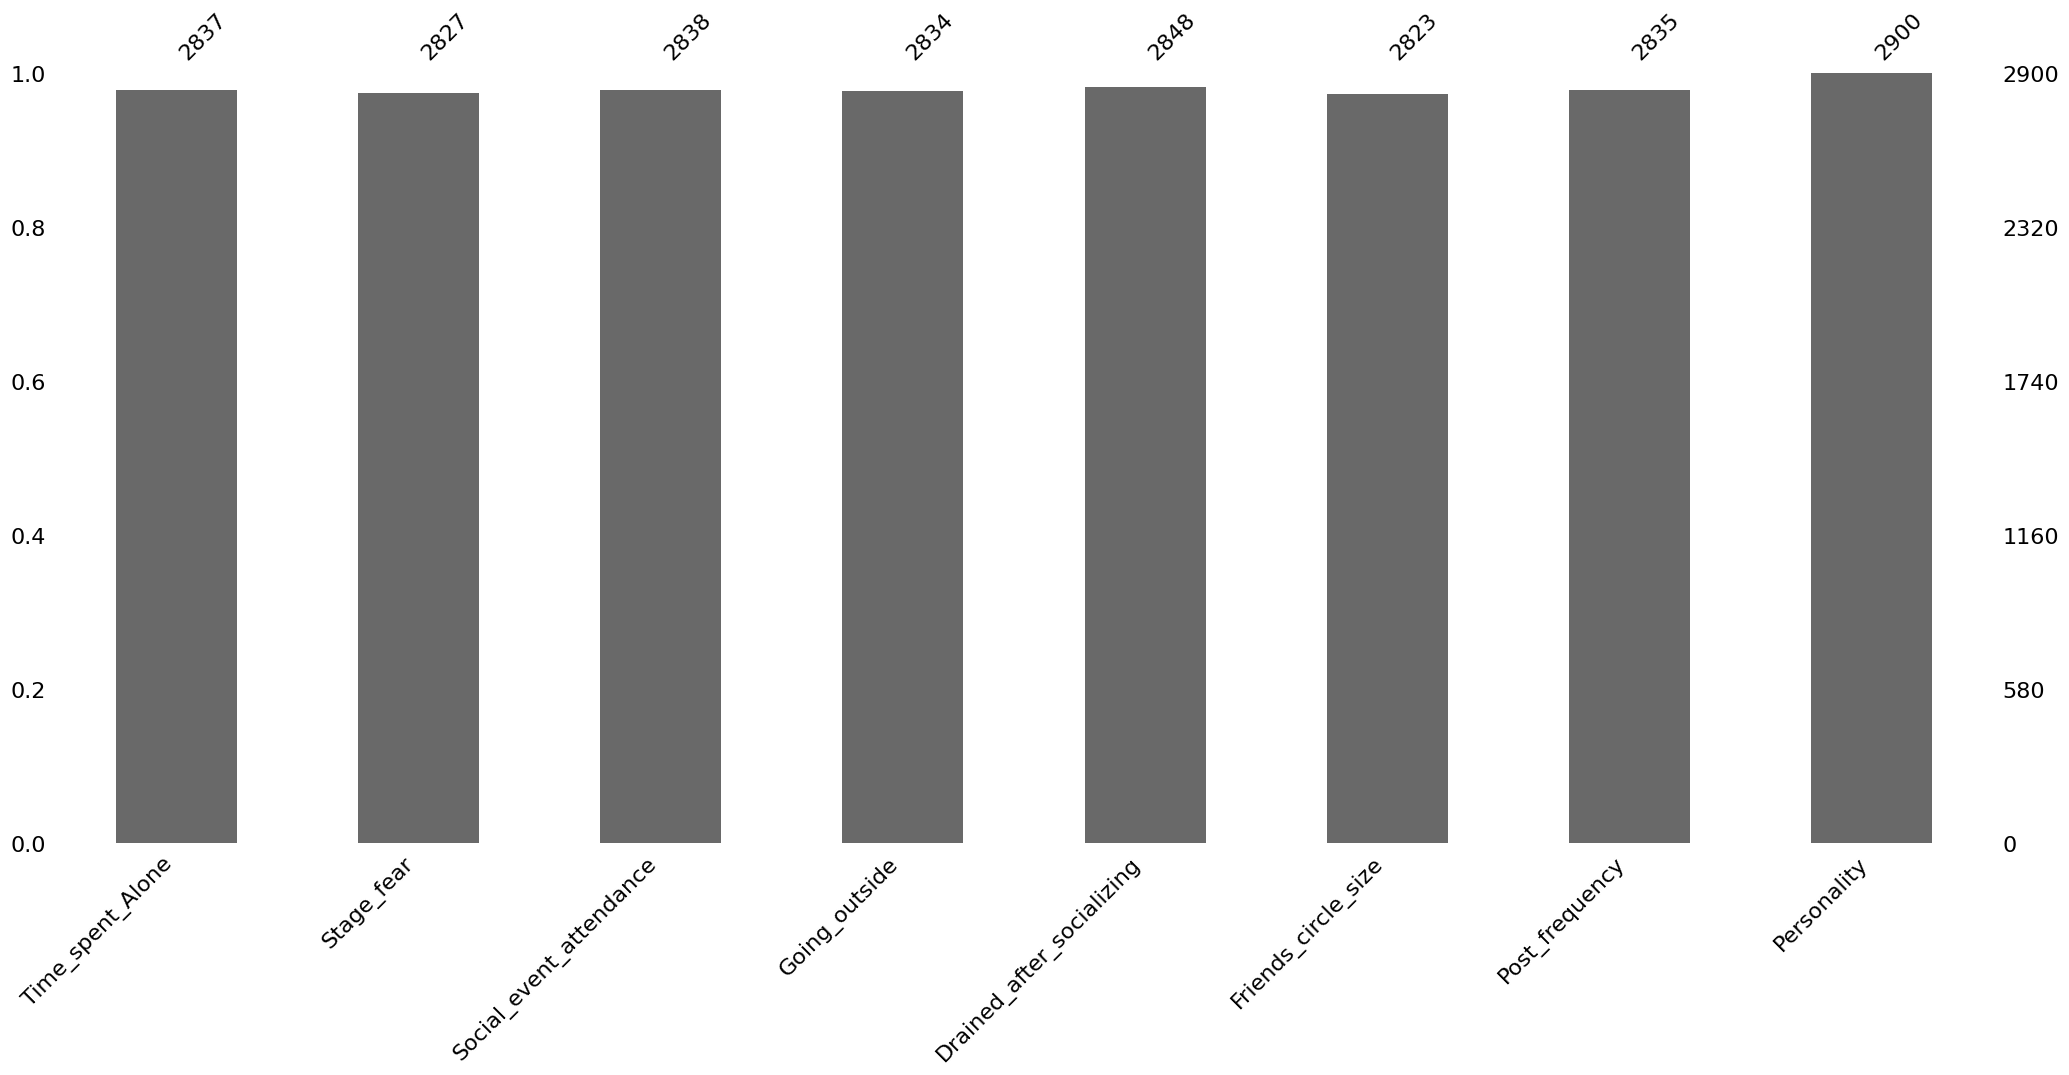

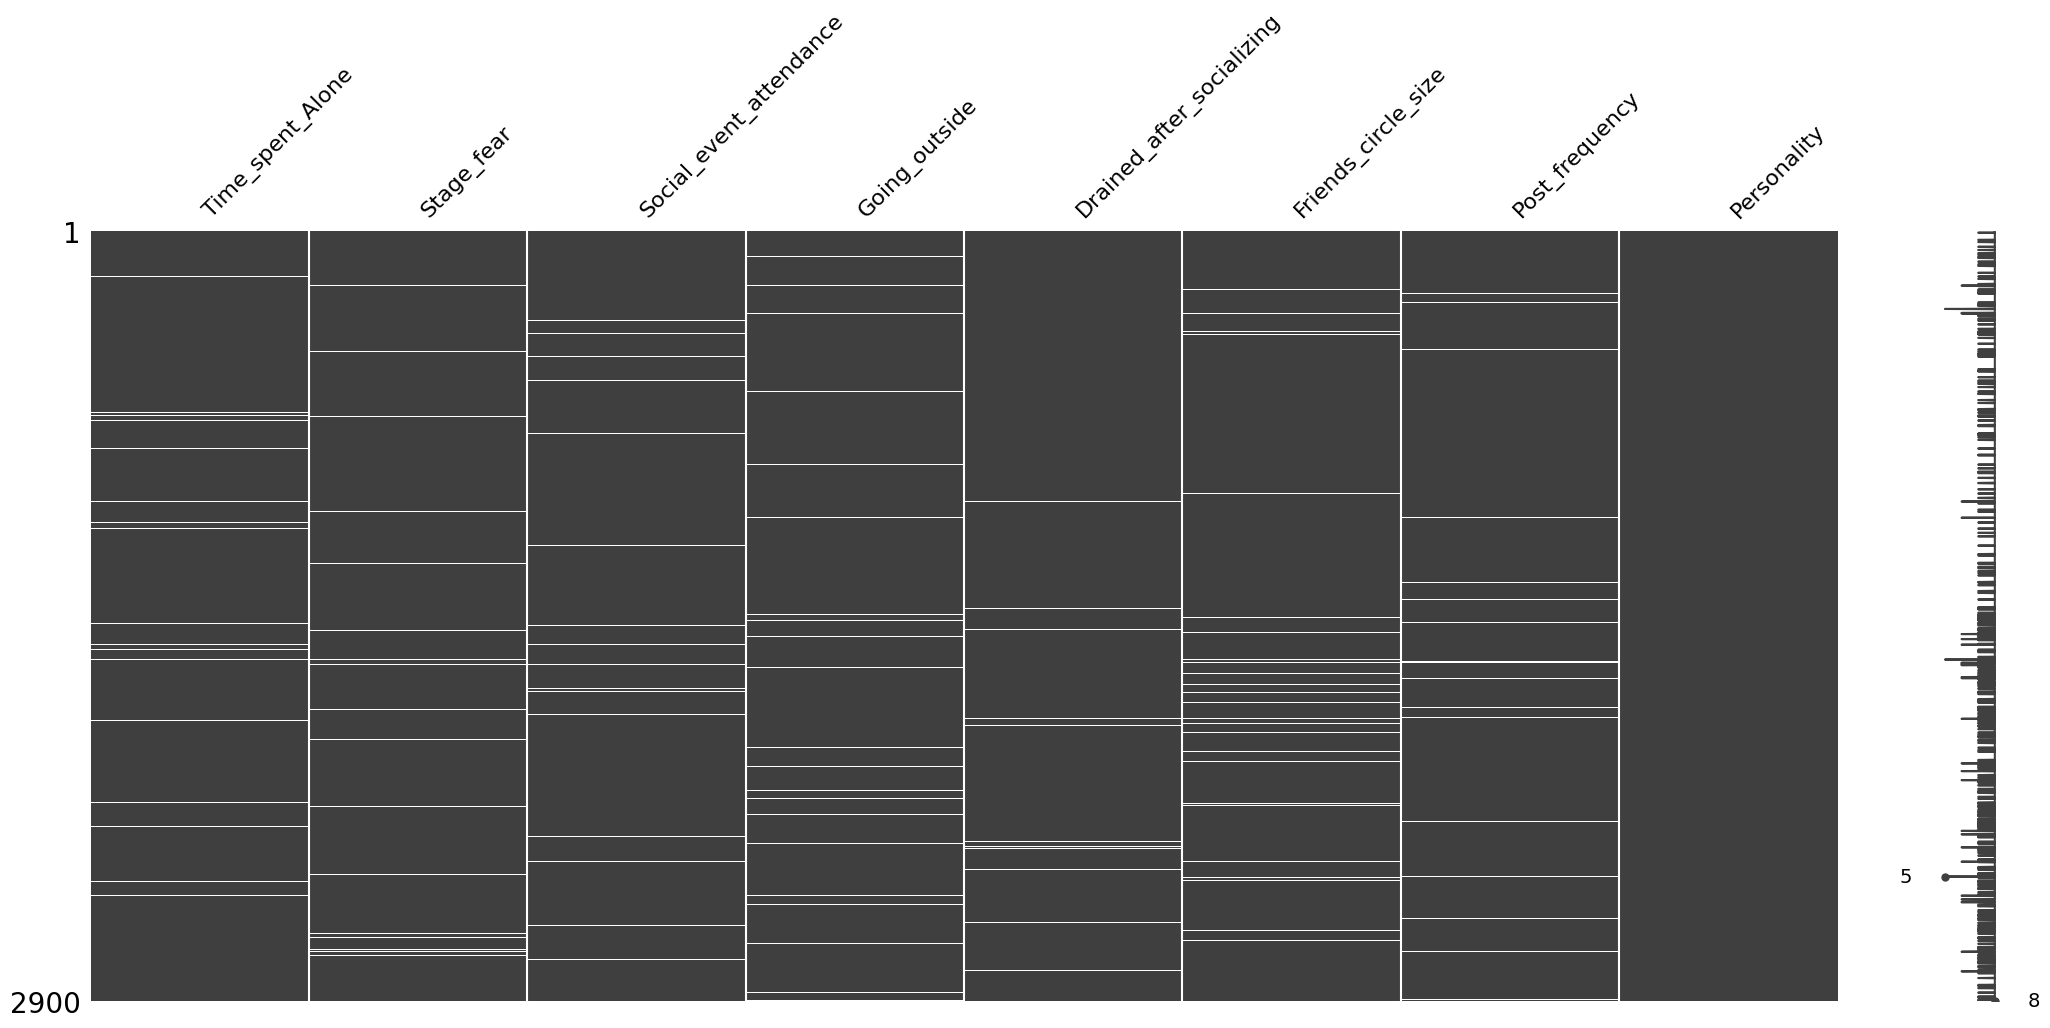

In [7]:
msno.bar(ds)
msno.matrix(ds)

<Axes: >

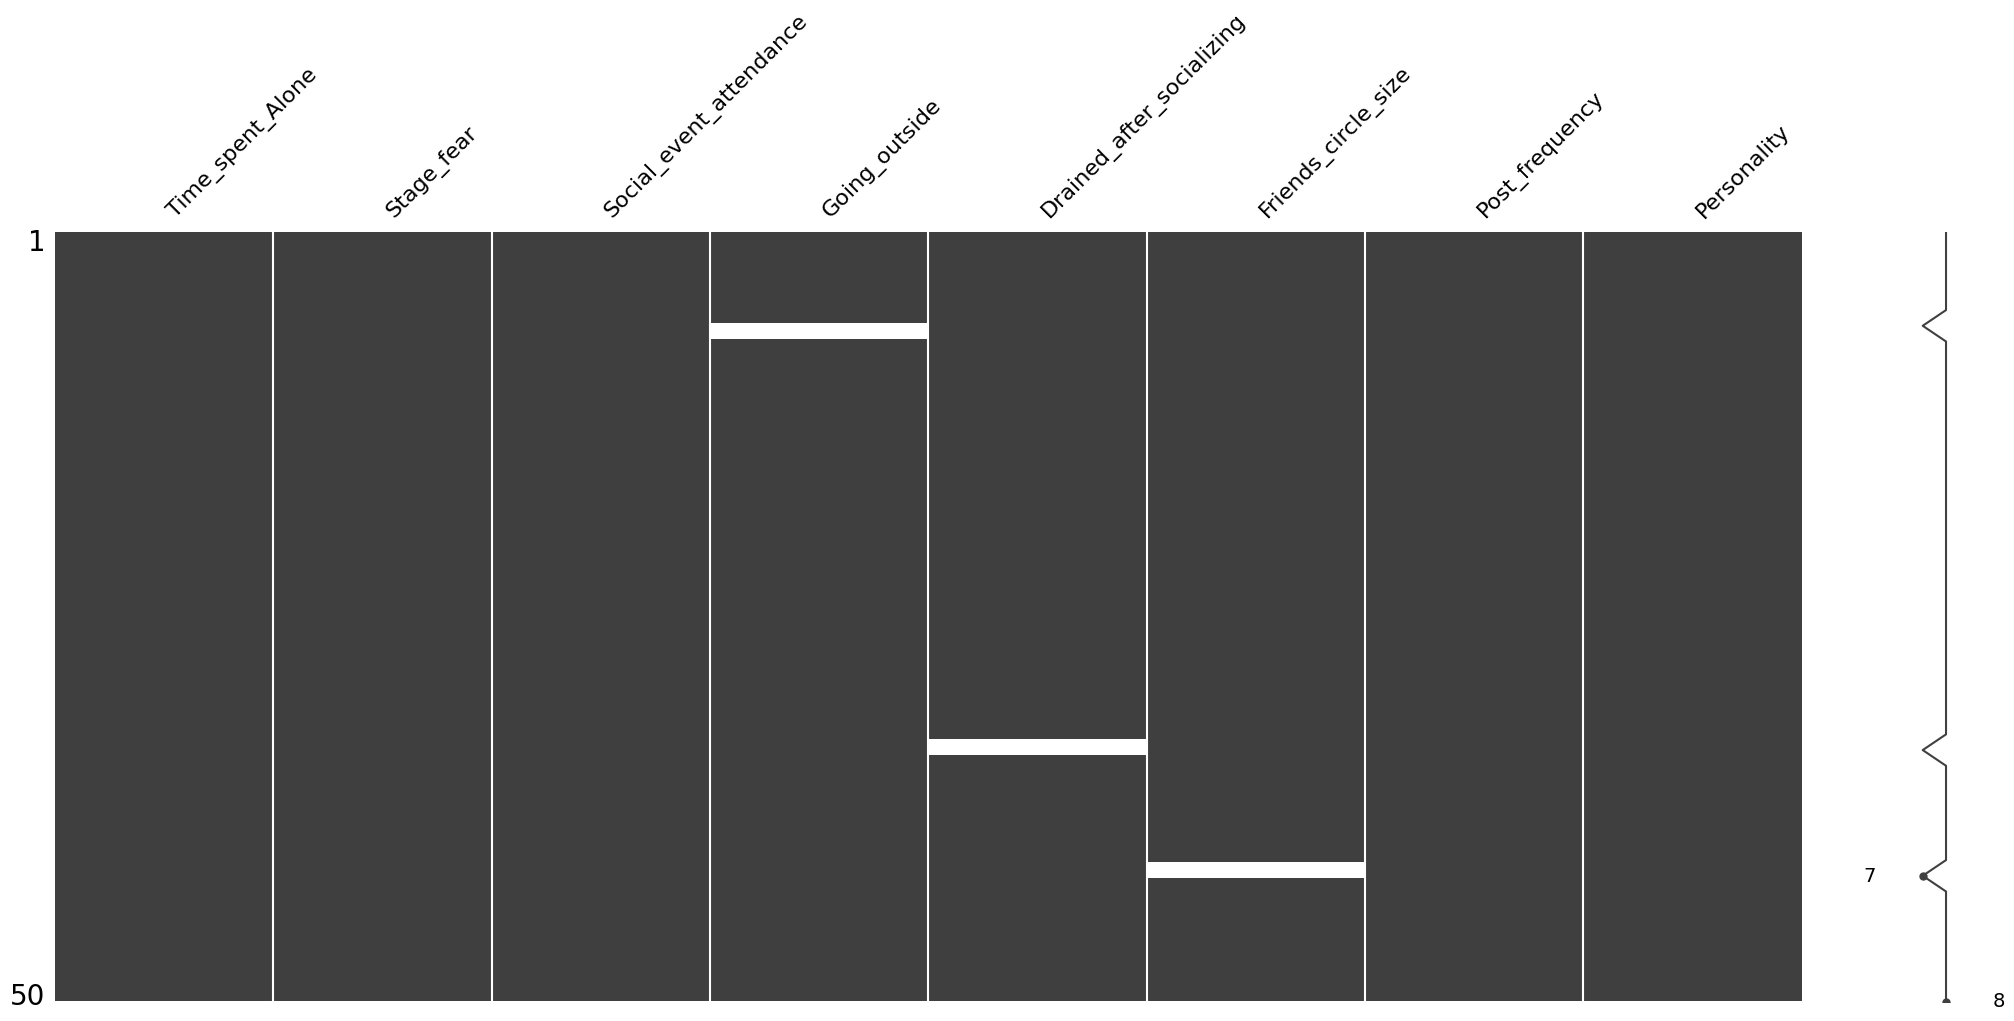

In [8]:
msno.matrix(ds[:50])

In [9]:
ds2["Time_spent_Alone"].fillna(ds2["Time_spent_Alone"].mean(),inplace=True)
ds2["Social_event_attendance"].fillna(ds2["Time_spent_Alone"].mean(),inplace=True)
ds2["Going_outside"].fillna(ds2["Time_spent_Alone"].mean(),inplace=True)
ds2["Friends_circle_size"].fillna(ds2["Time_spent_Alone"].mean(),inplace=True)
ds2["Post_frequency"].fillna(ds2["Time_spent_Alone"].mean(),inplace=True)
ds2.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,73
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,52
Friends_circle_size,0
Post_frequency,0
Personality,0


In [10]:
ds2

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.000000,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.000000,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.000000,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.000000,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.000000,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.000000,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.000000,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.000000,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,4.505816,Yes,2.0,0.0,Introvert


<Axes: xlabel='Social_event_attendance'>

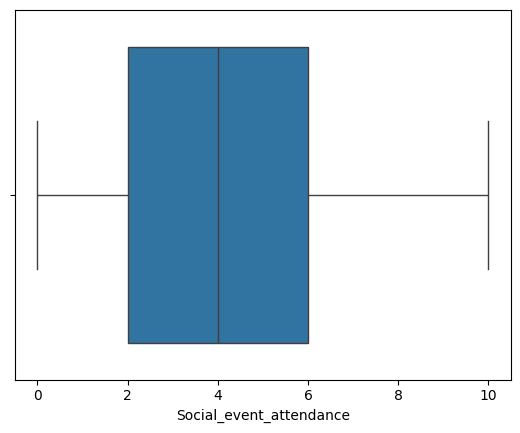

In [11]:
sns.boxplot(x=ds2["Social_event_attendance"])

<Axes: xlabel='Time_spent_Alone'>

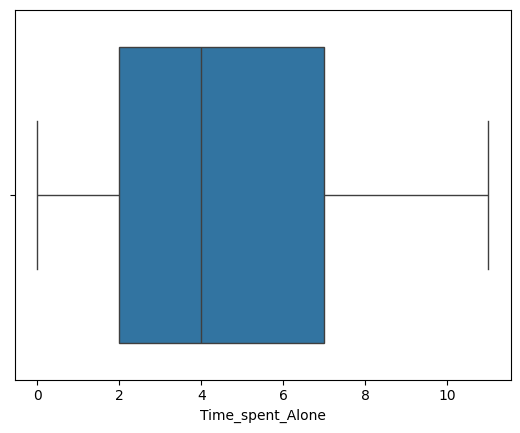

In [12]:
sns.boxplot(x=ds2["Time_spent_Alone"])

In [13]:
ds2['Stage_fear'].value_counts()

,count
Stage_fear,
No,1417
Yes,1410


In [14]:
ds2['Drained_after_socializing'].value_counts()

,count
Drained_after_socializing,
No,1441
Yes,1407


In [15]:
ds2[["Personality","Stage_fear","Drained_after_socializing"]].value_counts()

,,,count
Personality,Stage_fear,Drained_after_socializing,
Extrovert,No,No,1320
Introvert,Yes,Yes,1266
Extrovert,Yes,Yes,111
Introvert,No,No,79


In [16]:
ds2[["Stage_fear","Drained_after_socializing"]].value_counts()

,,count
Stage_fear,Drained_after_socializing,
No,No,1399
Yes,Yes,1377


In [17]:
ds2.loc[(ds2['Stage_fear'].isnull()) & (ds2['Drained_after_socializing'] == 'Yes'), 'Stage_fear'] = 'Yes'
ds2.loc[(ds2['Stage_fear'].isnull()) & (ds2['Drained_after_socializing'] == 'No'), 'Stage_fear'] = 'No'
ds2.loc[(ds2['Drained_after_socializing'].isnull()) & (ds2['Stage_fear'] == 'Yes'), 'Drained_after_socializing'] = 'Yes'
ds2.loc[(ds2['Drained_after_socializing'].isnull()) & (ds2['Stage_fear'] == 'No'), 'Drained_after_socializing'] = 'No'

In [18]:
ds2.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,1
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,1
Friends_circle_size,0
Post_frequency,0
Personality,0


In [21]:
ds2.loc[(ds2['Drained_after_socializing'].isnull()) & (ds2['Personality'] == 'Introvert'), 'Drained_after_socializing'] = 'Yes'
ds2.loc[(ds2['Drained_after_socializing'].isnull()) & (ds2['Personality'] == 'Extrovert'), 'Drained_after_socializing'] = 'No'
ds2.loc[(ds2['Personality'] == 'Introvert') & (ds2['Stage_fear'].isnull()), 'Stage_fear'] = 'Yes'
ds2.loc[(ds2['Personality'] == 'Extrovert') & (ds2['Stage_fear'].isnull()), 'Stage_fear'] = 'No'
ds2.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0
